Задание 1. 
1. При помощи функции make_blobs() из модуля sklearn.datasets (см.пример ниже) сгенерировать исходные данные для задачи классификации:
– матрицу признаков, содержащую по три признака для 500 примеров;
– массив целевых меток, представляющий четыре класса.
Значения аргументов random_state и cluster_std функции make_blobs() необходимо в random_state=2, cluster_std=1.0б 
Вариант 12.л.1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
x, y = make_blobs(500, 3, centers=4, random_state=2, cluster_std=1.0)

Задание 2. 
Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности полученных массивов. Вывести на печать уникальные метки классов в наборе данных.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=0, stratify=y)

In [4]:
print(f'''Обучающий набор:
Размерность массива признаков: {x_train.shape}
Размерность целевых признаков: {y_train.shape}
Уникальные метки классов: {np.unique(y_train)}

Тестовый набор:
Размерность массива признаков: {x_test.shape}
Размерность целевых признаков: {y_test.shape}
Уникальные метки классов: {np.unique(y_test)}''')

Обучающий набор:
Размерность массива признаков: (350, 3)
Размерность целевых признаков: (350,)
Уникальные метки классов: [0 1 2 3]

Тестовый набор:
Размерность массива признаков: (150, 3)
Размерность целевых признаков: (150,)
Уникальные метки классов: [0 1 2 3]


Задание 3. 
Выполнить масштабирование признаков.

In [15]:
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)

x_train_std = standard_scaler.transform(x_train)
x_test_std = standard_scaler.transform(x_test)

Задание 4.
Решить задачу классификации с использованием методом логистической регрессии.

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

Задание 5.
Проверить работу классификатора на тестовых данных. Определить и вывести на печать:
– число неверно классифицированных образов;
– "верность" классификации (в комментариях пояснить, что обозначает полученное значение "Верности");
– вероятности принадлежности образцов с номерами 10, 20 и 100 различным классам (только для модели логистической регрессии).

In [7]:
y_pred_svm = svm.predict(x_test_scaled)
y_pred_train_svm = svm.predict(x_train_scaled)
mean_mistakes_svm = ((y_test!=y_pred_svm).sum() + (y_train!=y_pred_train_svm).sum())/2

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_svm).sum()}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_svm)}''')

Число неверно классифицированных образов: 8
Верность классификации: 0.9466666666666667


Задание 6.
Для трёх проекций пространства признаков построить графики, иллюстрирующие расположение объектов различных классов. Классы на графиках обозначать различными цветами и маркерами. Обвести на графиках окружностями те объекты, которые были неверно классифицированы.

In [8]:
right_0 = (y_test==0) & (y_test == y_pred_svm)
right_1 = (y_test==1) & (y_test == y_pred_svm)
right_2 = (y_test==2) & (y_test == y_pred_svm)
right_3 = (y_test==3) & (y_test == y_pred_svm)

wrong_0 = (y_test==0) & (y_test != y_pred_svm)
wrong_1 = (y_test==1) & (y_test != y_pred_svm)
wrong_2 = (y_test==2) & (y_test != y_pred_svm)
wrong_3 = (y_test==3) & (y_test != y_pred_svm)

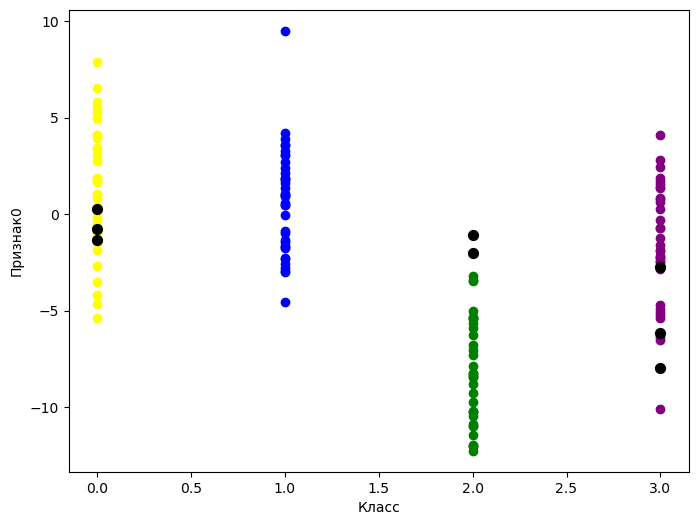

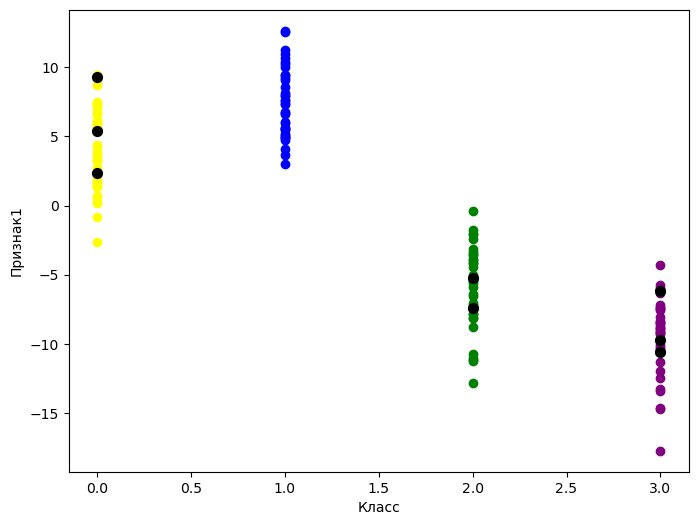

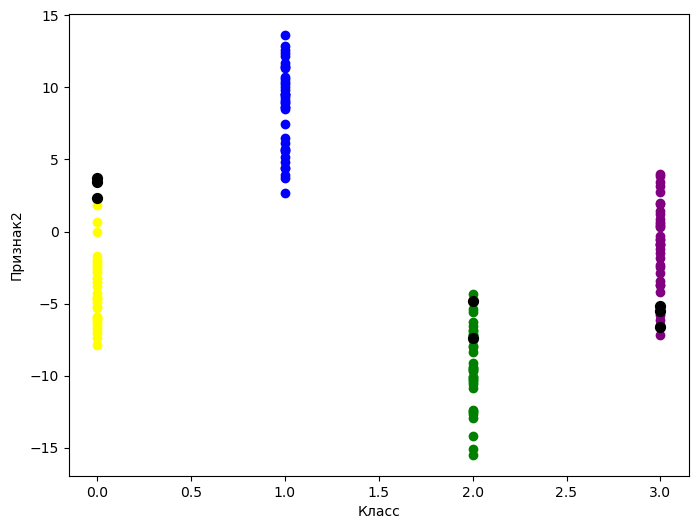

In [11]:
for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.full(len(x_test[right_0][:,i]), 0), x_test[right_0][:,i], color='yellow')
    plt.scatter(np.full(len(x_test[right_1][:,i]), 1), x_test[right_1][:,i], color='blue')
    plt.scatter(np.full(len(x_test[right_2][:,i]), 2), x_test[right_2][:,i], color='green')
    plt.scatter(np.full(len(x_test[right_3][:,i]), 3), x_test[right_3][:,i], color='purple')

    plt.scatter(np.full(len(x_test[wrong_0][:,i]), 0), x_test[wrong_0][:,i], c='black', marker='o', s=50)
    plt.scatter(np.full(len(x_test[wrong_1][:,i]), 1), x_test[wrong_1][:,i], c='black', marker='o', s=50)
    plt.scatter(np.full(len(x_test[wrong_2][:,i]), 2), x_test[wrong_2][:,i], c='black', marker='o', s=50)
    plt.scatter(np.full(len(x_test[wrong_3][:,i]), 3), x_test[wrong_3][:,i], c='black', marker='o', s=50)

    plt.xlabel('Класс')
    plt.ylabel('Признак'+ str(i))
    plt.show()
    print()

Выводы: В ходе лабораторной работы для линейно разделимых объектов, состоящих из 3 признаков и разделенных на 4 класса была решена задача классификации.
Для решения задачи использовалась модельLogisticRegressionM, которая по итогам обучения показала отличные результаты: на тестовом наборе данных неверно были распознаны 8 объектов. Таким образом, точность на тестовой выборке составила 94.6%.